In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='8G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from c:\programdata\miniconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\SUVRAL~1\AppData\Local\Temp\tmpke96vi0f
  JVM stdout: C:\Users\SUVRAL~1\AppData\Local\Temp\tmpke96vi0f\h2o_Suvralipi_started_from_python.out
  JVM stderr: C:\Users\SUVRAL~1\AppData\Local\Temp\tmpke96vi0f\h2o_Suvralipi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,08 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_Suvralipi_gwve16
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [3]:
from FraudDependencyParser import FraudDependencyParser
obj = FraudDependencyParser()
input_df=h2o.import_file(obj.inpath+'Input_dataset.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
input_df.head()

step,customer,age,gender,merchant,category,amount,cust_zip_code,merch_zip_code,fraud
0,C1093826151,4,M,M348934600,transportation,4.55,513111,943864,0
2,C1093826151,4,M,M348934600,transportation,37.21,513111,943864,0
3,C1093826151,4,M,M348934600,transportation,31.63,513111,943864,0
4,C1093826151,4,M,M348934600,transportation,35.86,513111,943864,0
6,C1093826151,4,M,M348934600,transportation,39.58,513111,943864,0
7,C1093826151,4,M,M348934600,transportation,32.04,513111,943864,0
9,C1093826151,4,M,M348934600,transportation,12.52,513111,943864,0
10,C1093826151,4,M,M348934600,transportation,4.68,513111,943864,0
11,C1093826151,4,M,M348934600,transportation,2.22,513111,943864,0
13,C1093826151,4,M,M348934600,transportation,49.42,513111,943864,0


In [6]:
input_df.describe()

Rows:590934
Cols:10




,step,customer,age,gender,merchant,category,amount,cust_zip_code,merch_zip_code,fraud
type,int,enum,int,enum,enum,enum,real,int,int,int
mins,0.0,,0.0,,,,0.0,309.0,12764.0,0.0
mean,94.45951832184295,,3.006214350146839,,,,37.89774717650359,495604.1910585613,489640.5529416146,0.012116412323542054
maxs,178.0,,6.0,,,,8329.96,999550.0,993709.0,1.0
sigma,50.776508786141484,,1.3253336753647298,,,,111.5633444768106,288872.46978049306,384149.4195437661,0.10940578198332485
zeros,2430,,2434,,,,52,0,0,583774
missing,0,0,1170,0,0,0,0,0,0,0
0,0.0,C1093826151,4.0,M,M348934600,transportation,4.55,513111.0,943864.0,0.0
1,2.0,C1093826151,4.0,M,M348934600,transportation,37.21,513111.0,943864.0,0.0
2,3.0,C1093826151,4.0,M,M348934600,transportation,31.63,513111.0,943864.0,0.0


In [8]:
target = ['gender','merchant','category']
input_df[target] = input_df[target].asfactor()

In [10]:
input_df.head(6)

step,customer,age,gender,merchant,category,amount,cust_zip_code,merch_zip_code,fraud
0,C1093826151,4,M,M348934600,transportation,4.55,513111,943864,0
2,C1093826151,4,M,M348934600,transportation,37.21,513111,943864,0
3,C1093826151,4,M,M348934600,transportation,31.63,513111,943864,0
4,C1093826151,4,M,M348934600,transportation,35.86,513111,943864,0
6,C1093826151,4,M,M348934600,transportation,39.58,513111,943864,0
7,C1093826151,4,M,M348934600,transportation,32.04,513111,943864,0


In [11]:
y = "fraud"
x = ['age','gender','merchant','category','amount']

In [19]:
splits = input_df.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

In [20]:
aml = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)
aml.train(x = x, y = y, training_frame = train)

AutoML progress: |
17:39:31.630: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [21]:
lb = aml.leaderboard
#lb.head()
lb # Entire leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200222_173931,0.0031044,0.0557171,0.0031044,0.00642349,0.0390109
StackedEnsemble_BestOfFamily_AutoML_20200222_173931,0.00310518,0.0557242,0.00310518,0.00644148,0.0390129
GBM_1_AutoML_20200222_173931,0.00310524,0.0557247,0.00310524,0.0063718,0.0389995
GBM_2_AutoML_20200222_173931,0.00312877,0.0559354,0.00312877,0.00638647,0.0391828
GBM_3_AutoML_20200222_173931,0.00316229,0.0562343,0.00316229,0.00629139,0.0393822
DRF_1_AutoML_20200222_173931,0.00360101,0.0600084,0.00360101,0.00915674,0.0412054
GLM_1_AutoML_20200222_173931,0.00503282,0.0709424,0.00503282,0.0154315,0.0491744


In [22]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

c:\programdata\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


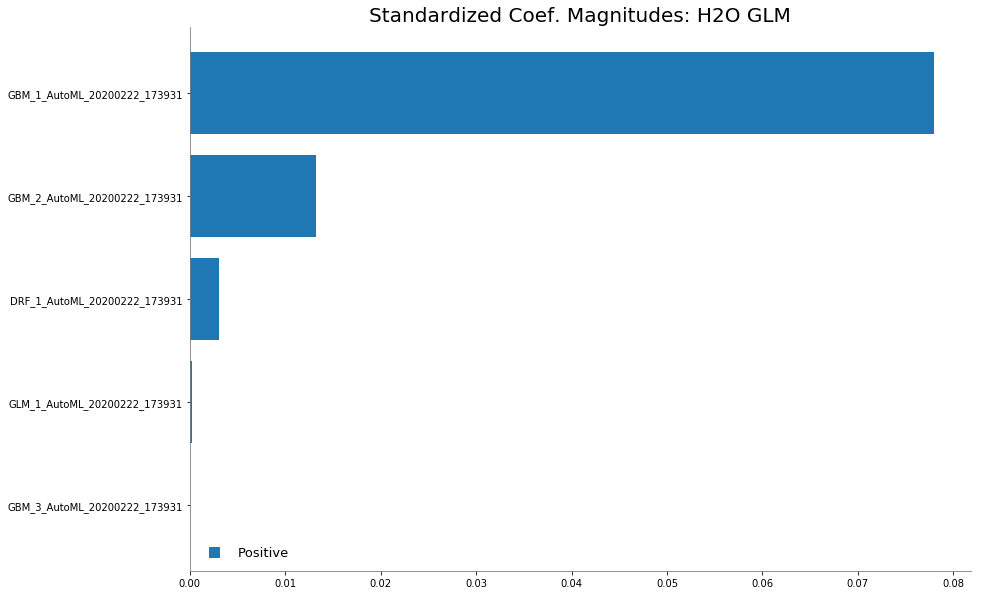

In [23]:
%matplotlib inline
metalearner.std_coef_plot()

In [25]:
pred = aml.predict(test)
pred.head(6)

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
-3.52814e-05
-1.59924e-05
-6.45021e-05
-5.11853e-07
-4.83575e-05
-6.13036e-05
